### I want 10 data visualizations from this data.  You can use any of the datasets, all of the datasets, just the combined datasets.  This is totally up to you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
stocks =pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [3]:
stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [4]:
walmart = stocks[stocks['Name'].isin(['WMT'])].reset_index(drop=True)
amazon = stocks[stocks['Name'].isin(['AMZN'])].reset_index(drop=True)
homedepot = stocks[stocks['Name'].isin(['HD'])].reset_index(drop=True)

united = stocks[stocks['Name'].isin(['UTX'])].reset_index(drop=True)
boeing = stocks[stocks['Name'].isin(['BA'])].reset_index(drop=True)

amex = stocks[stocks['Name'].isin(['AXP'])].reset_index(drop=True)
goldman = stocks[stocks['Name'].isin(['GS'])].reset_index(drop=True)

nike = stocks[stocks['Name'].isin(['NKE'])].reset_index(drop=True)

### Stock price movement for American Express vs. Goldman Sachs

Text(0.5,1,'Stock price movement')

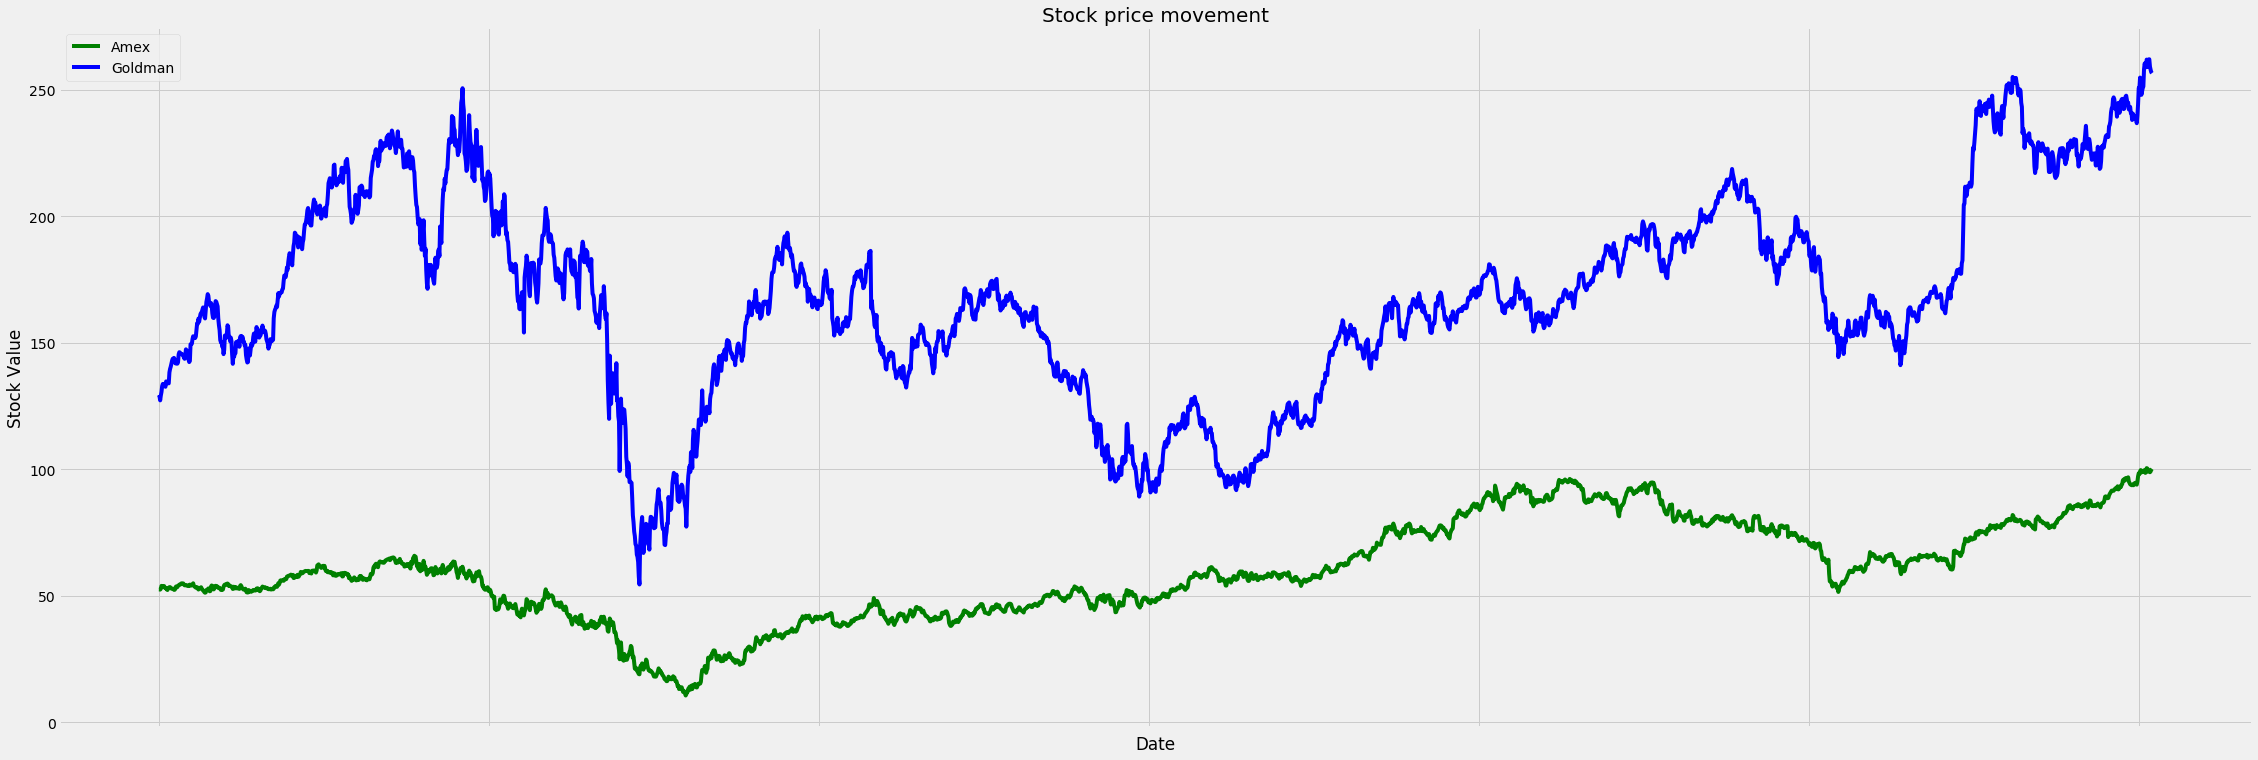

In [5]:
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(figsize=(35,12))
amex.plot(x='Date',y='High',label='Amex',ax=axes,  color='g')
goldman.plot(x='Date',y='High',label='Goldman',ax=axes,  color='b')
axes.set_ylabel("Stock Value")
axes.set_title("Stock price movement",fontsize=20)

### Stock price movement for United Technologies Corporation vs. The Boeing Company (Aircraft manufacturing companies)

Text(0.5,1,'Stock price movement')

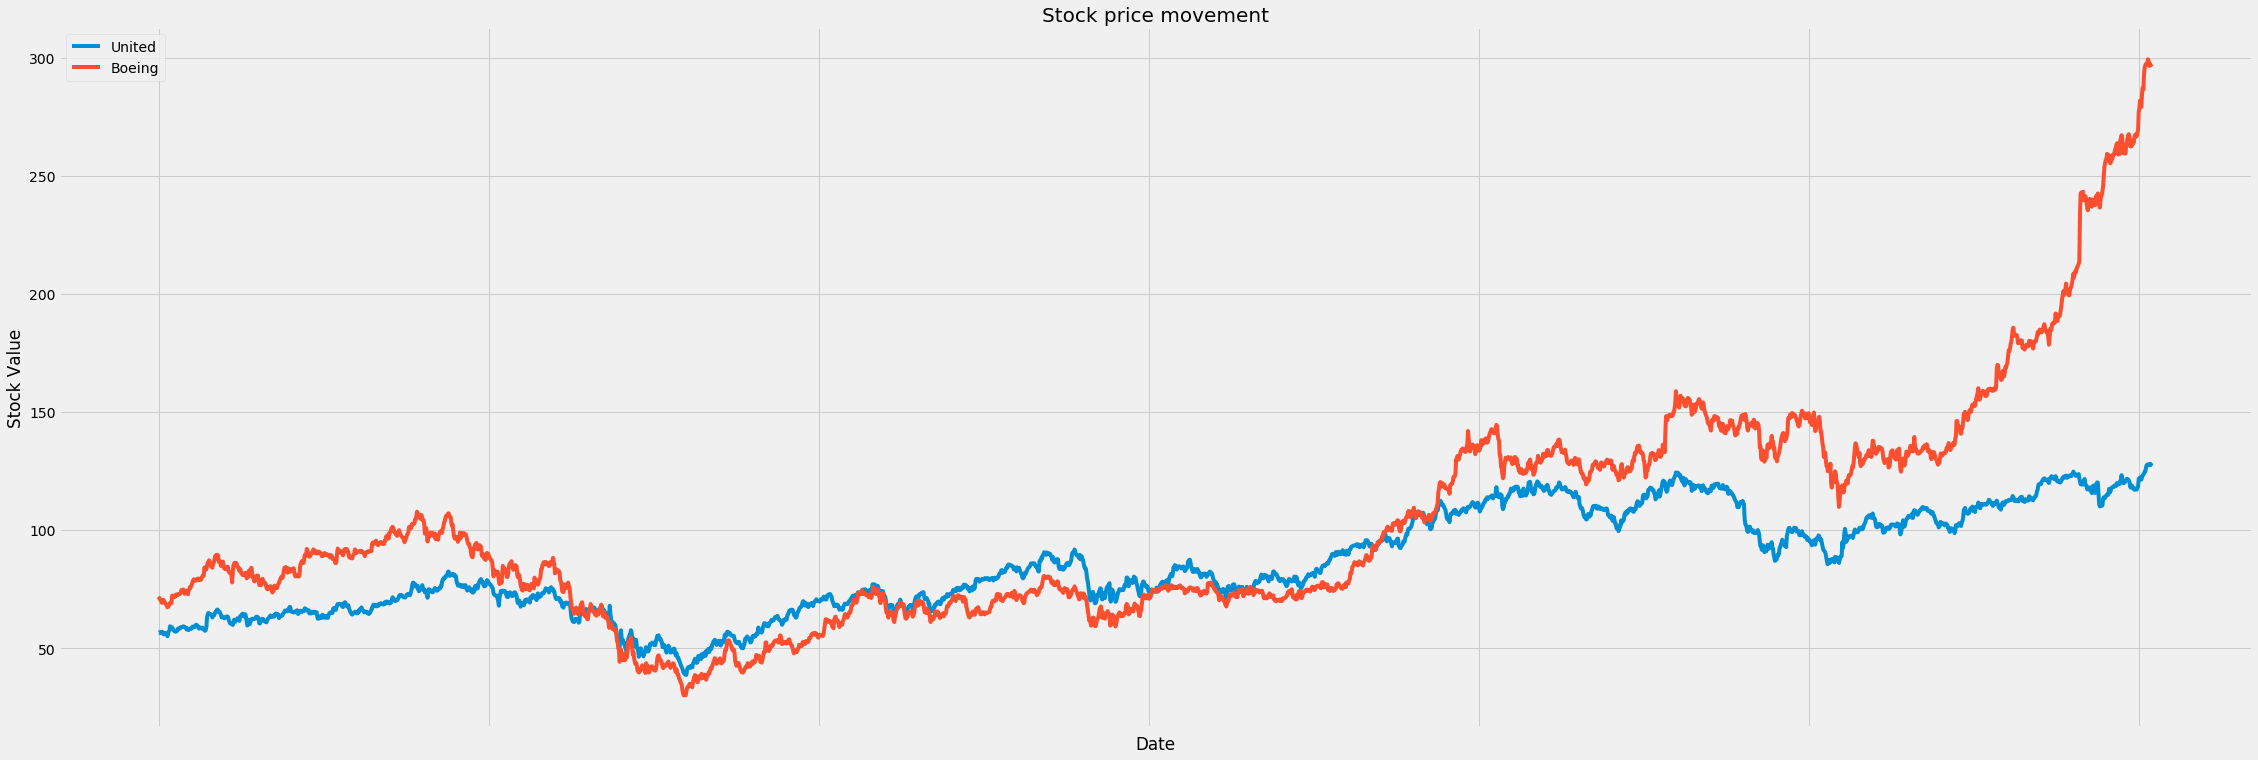

In [15]:
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(figsize=(35,12))
united.plot(x='Date',y='High',label='United',ax=axes)
boeing.plot(x='Date',y='High',label='Boeing',ax=axes)
axes.set_ylabel("Stock Value")
axes.set_title("Stock price movement",fontsize=20)

### Gain % in stock price over the overs for Chevron Corporation vs. ExxonMobil

Text(0.5,0,'Date')

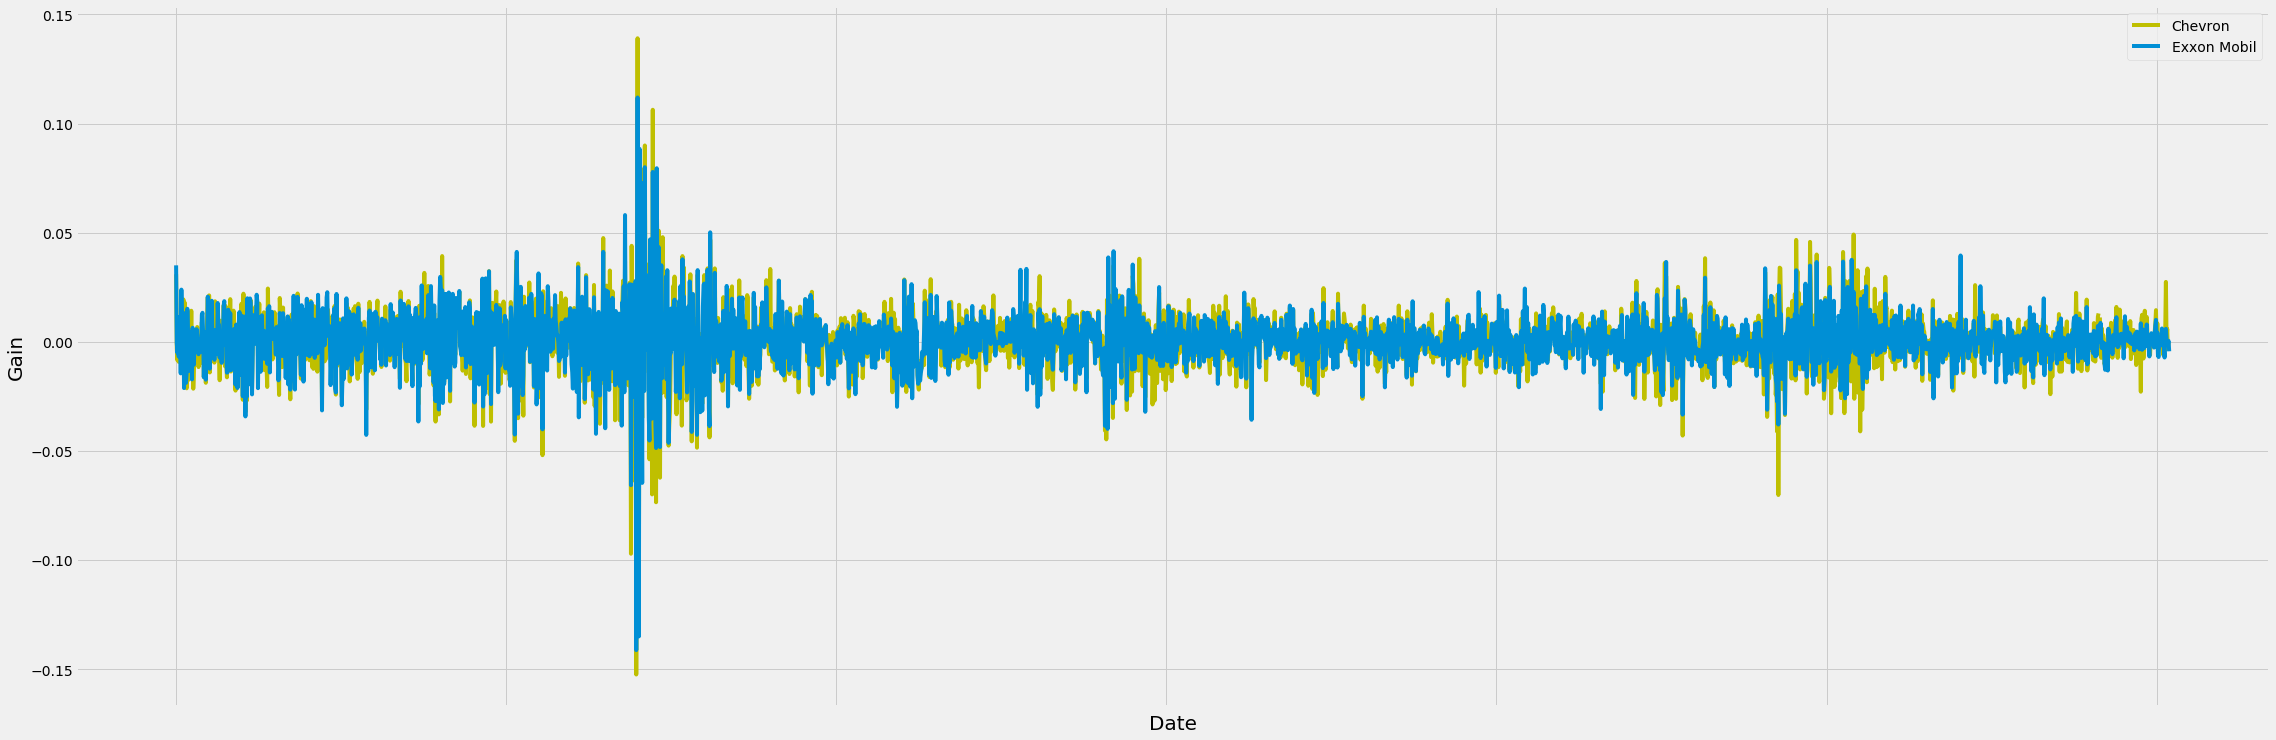

In [26]:
# Gain = Close - Open
plt.style.use('fivethirtyeight')
stocks['Gain']=(stocks['Close']-stocks['Open'])/stocks['Close']
fig,axes=plt.subplots(figsize=(35,12))
stocks[stocks['Name']=='CVX'].plot(x='Date',y='Gain',label='Chevron',ax=axes,  color='y')
stocks[stocks['Name']=='XOM'].plot(x='Date',y='Gain',label='Exxon Mobil',ax=axes)
axes.set_ylabel("Gain",fontsize=20)
axes.set_xlabel("Date",fontsize=20)

### Gain % in stock price over the overs for The Coca-Cola Company vs. McDonald's

Text(0.5,0,'Date')

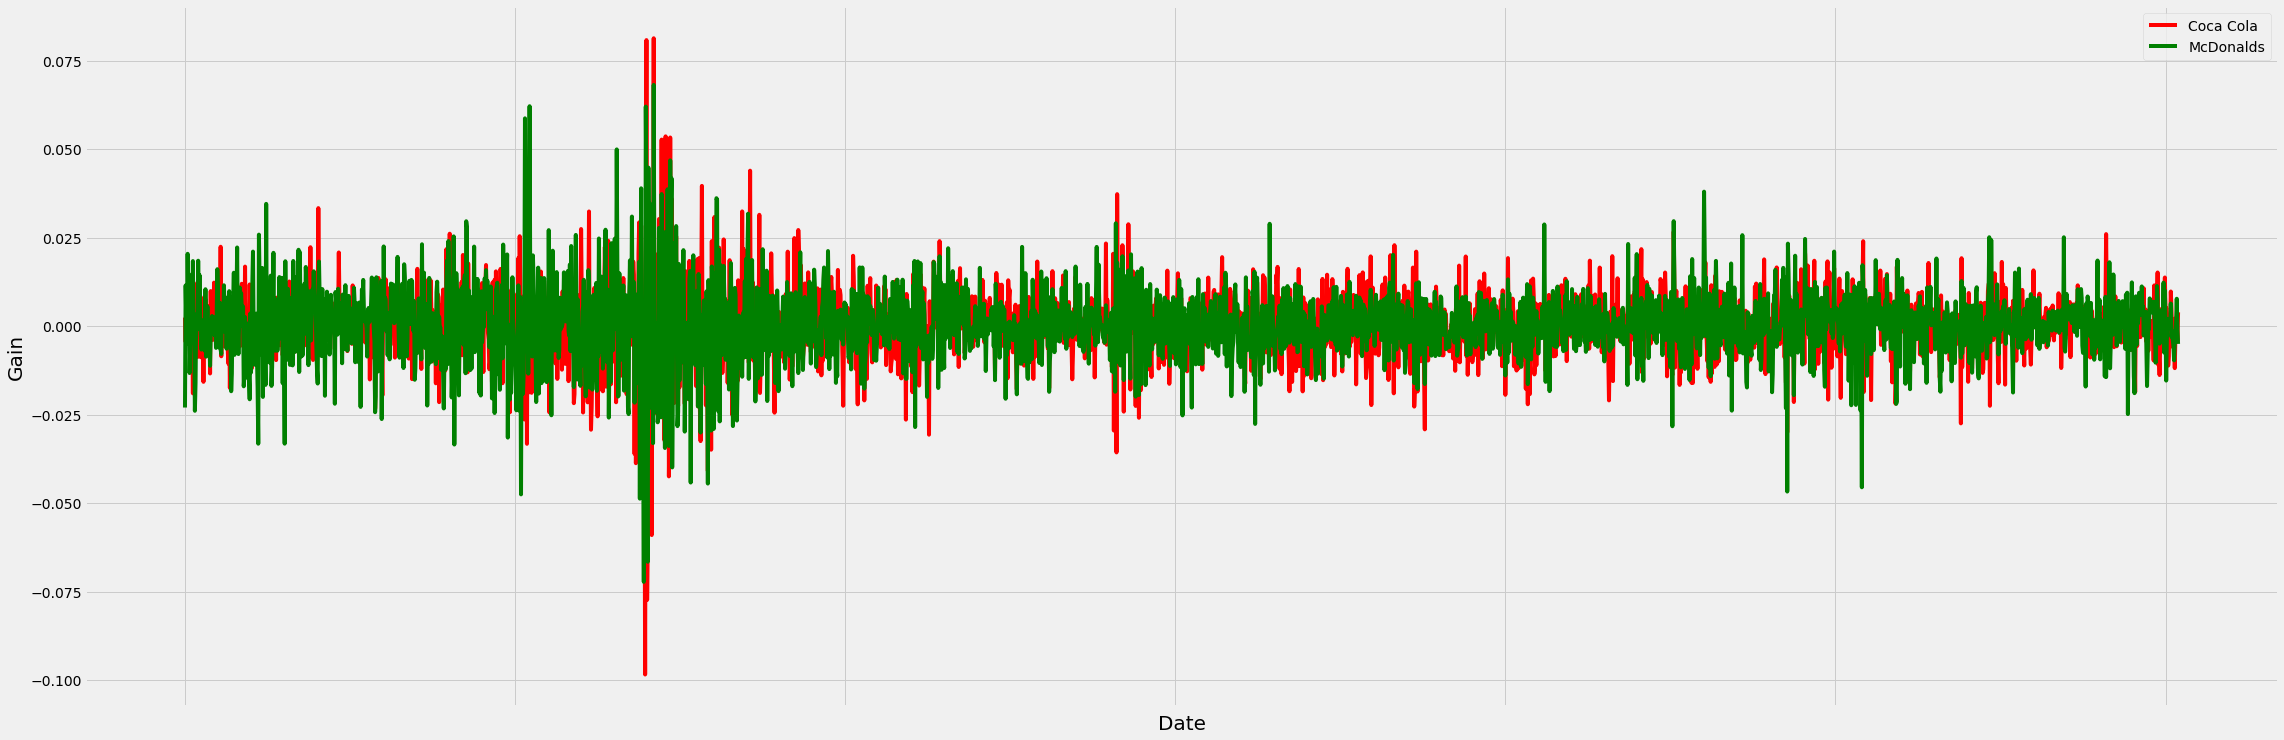

In [27]:
# Gain = Close - Open
plt.style.use('fivethirtyeight')
stocks['Gain']=(stocks['Close']-stocks['Open'])/stocks['Close']
fig,axes=plt.subplots(figsize=(35,12))
stocks[stocks['Name']=='KO'].plot(x='Date',y='Gain',label='Coca Cola',ax=axes, color='r')
stocks[stocks['Name']=='MCD'].plot(x='Date',y='Gain',label='McDonalds',ax=axes, color='g')
axes.set_ylabel("Gain",fontsize=20)
axes.set_xlabel("Date",fontsize=20)

### Monthly closing price distribution of Google, Microsoft Corporation and Apple (all Technology companies)

Text(0,0.5,'closing Price')

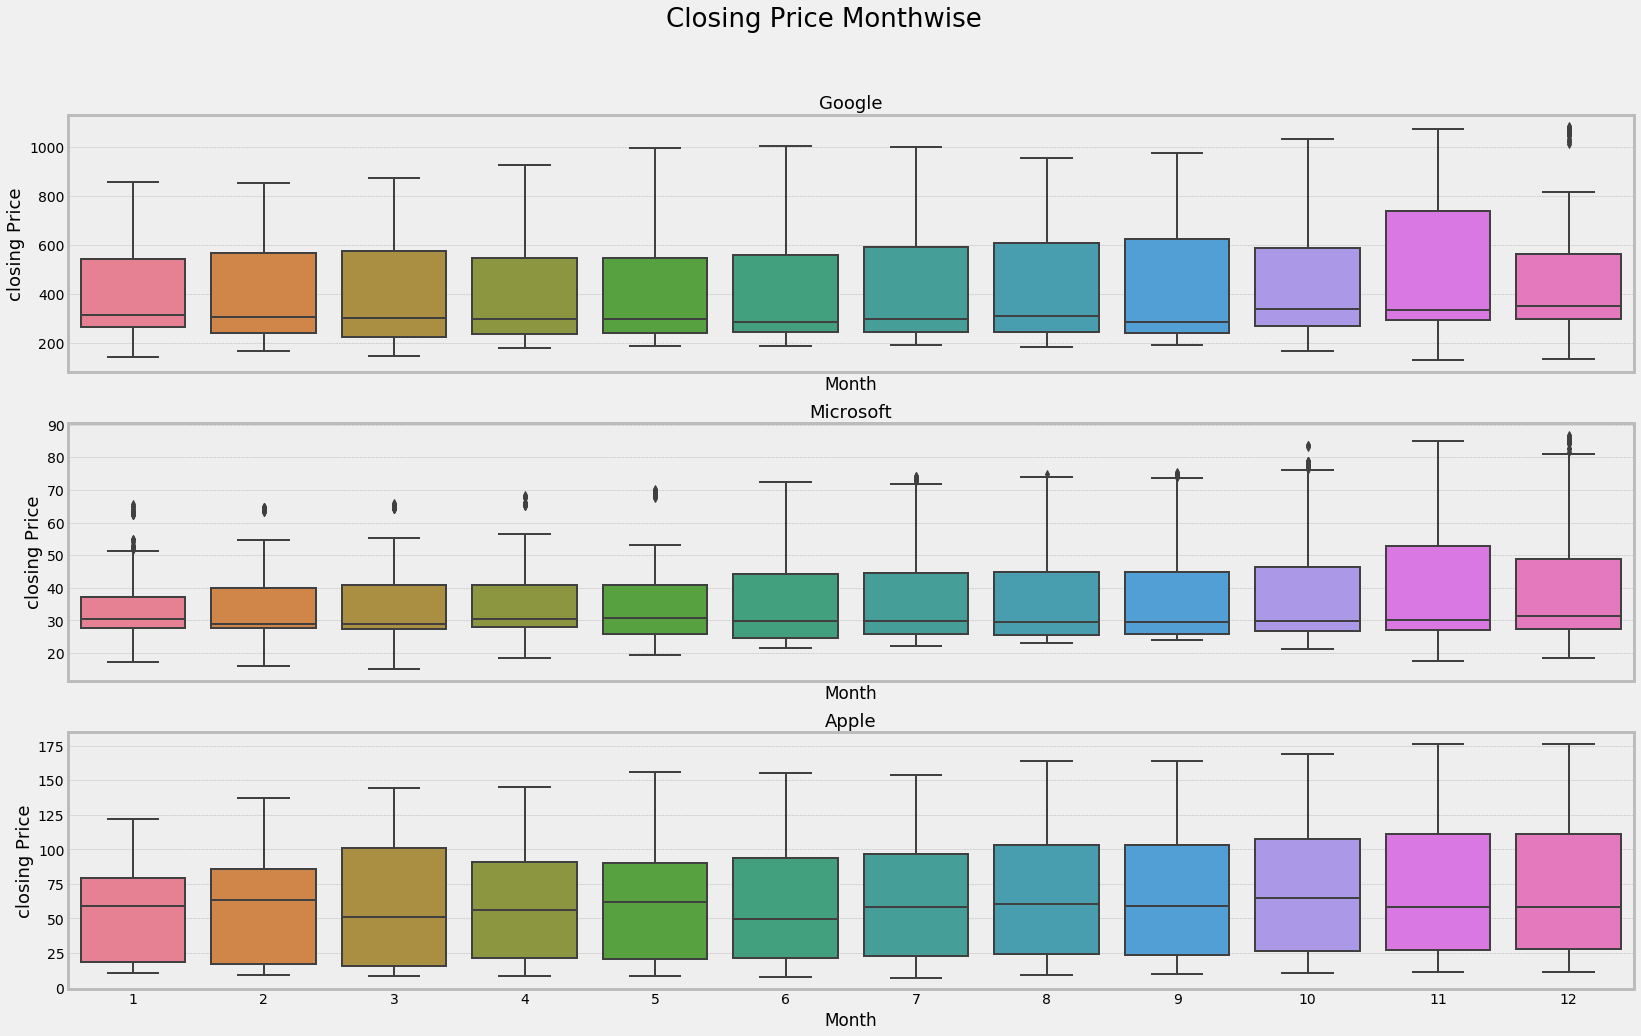

In [9]:
#monthly closing price distribution

stocks['Month']=pd.to_datetime(stocks['Date']).dt.month
plt.style.use('bmh')
fig,axes=plt.subplots(3,1,figsize=(25,15),sharex=True)

sns.boxplot(ax=axes[0],x='Month',y='Close',data=stocks[stocks['Name']=='GOOGL'],palette='husl')
sns.boxplot(ax=axes[1],x='Month',y='Close',data=stocks[stocks['Name']=='MSFT'],palette='husl')
sns.boxplot(ax=axes[2],x='Month',y='Close',data=stocks[stocks['Name']=='AAPL'],palette='husl')

plt.suptitle("Closing Price Monthwise",fontsize=26)

axes[0].set_title("Google",fontsize=18)
axes[1].set_title('Microsoft',fontsize=18)
axes[2].set_title("Apple",fontsize=18)


axes[0].set_ylabel("closing Price",fontsize=18)
axes[1].set_ylabel("closing Price",fontsize=18)
axes[2].set_ylabel("closing Price",fontsize=18)


### Monthly closing price distribution of Cisco Systems, Intel and IBM

Text(0,0.5,'closing Price')

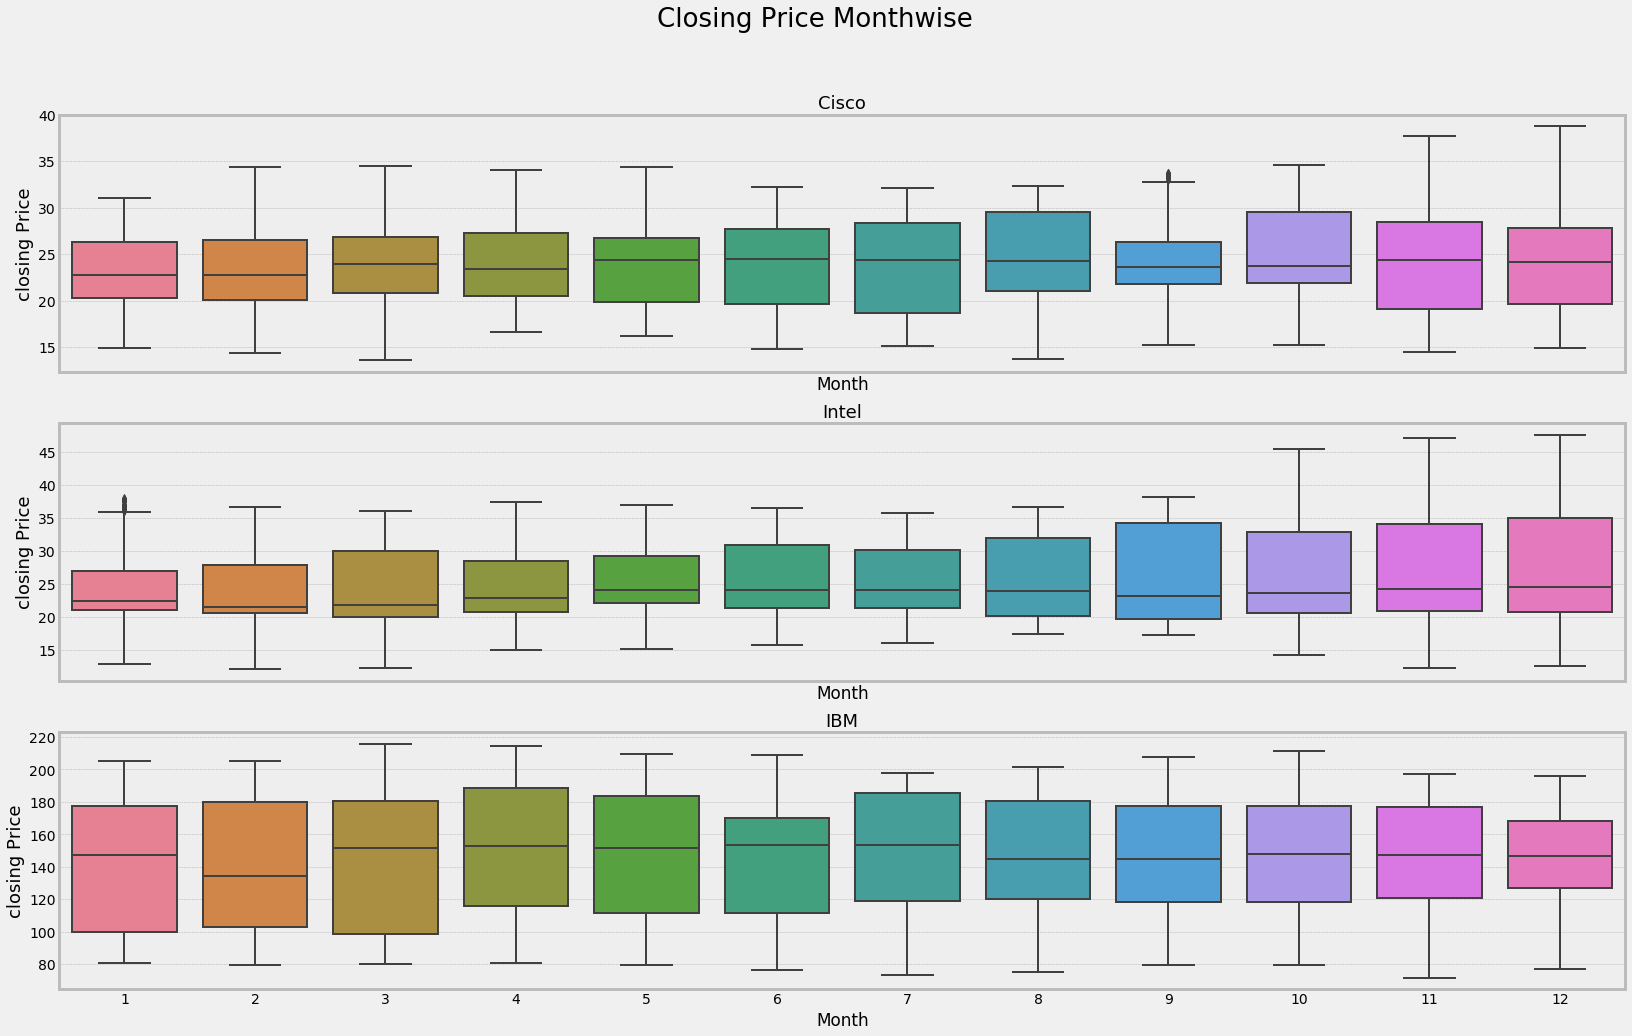

In [25]:
#monthly closing price distribution
plt.style.use('bmh')
stocks['Month']=pd.to_datetime(stocks['Date']).dt.month

fig,axes=plt.subplots(3,1,figsize=(25,15),sharex=True)

sns.boxplot(ax=axes[0],x='Month',y='Close',data=stocks[stocks['Name']=='CSCO'],palette='husl')
sns.boxplot(ax=axes[1],x='Month',y='Close',data=stocks[stocks['Name']=='INTC'],palette='husl')
sns.boxplot(ax=axes[2],x='Month',y='Close',data=stocks[stocks['Name']=='IBM'],palette='husl')

plt.suptitle("Closing Price Monthwise",fontsize=26)

axes[0].set_title("Cisco",fontsize=18)
axes[1].set_title('Intel',fontsize=18)
axes[2].set_title("IBM",fontsize=18)


axes[0].set_ylabel("closing Price",fontsize=18)
axes[1].set_ylabel("closing Price",fontsize=18)
axes[2].set_ylabel("closing Price",fontsize=18)

### Gain vs. Volume plot for Caterpillar Inc. and 3M (Manufacturing Companies)

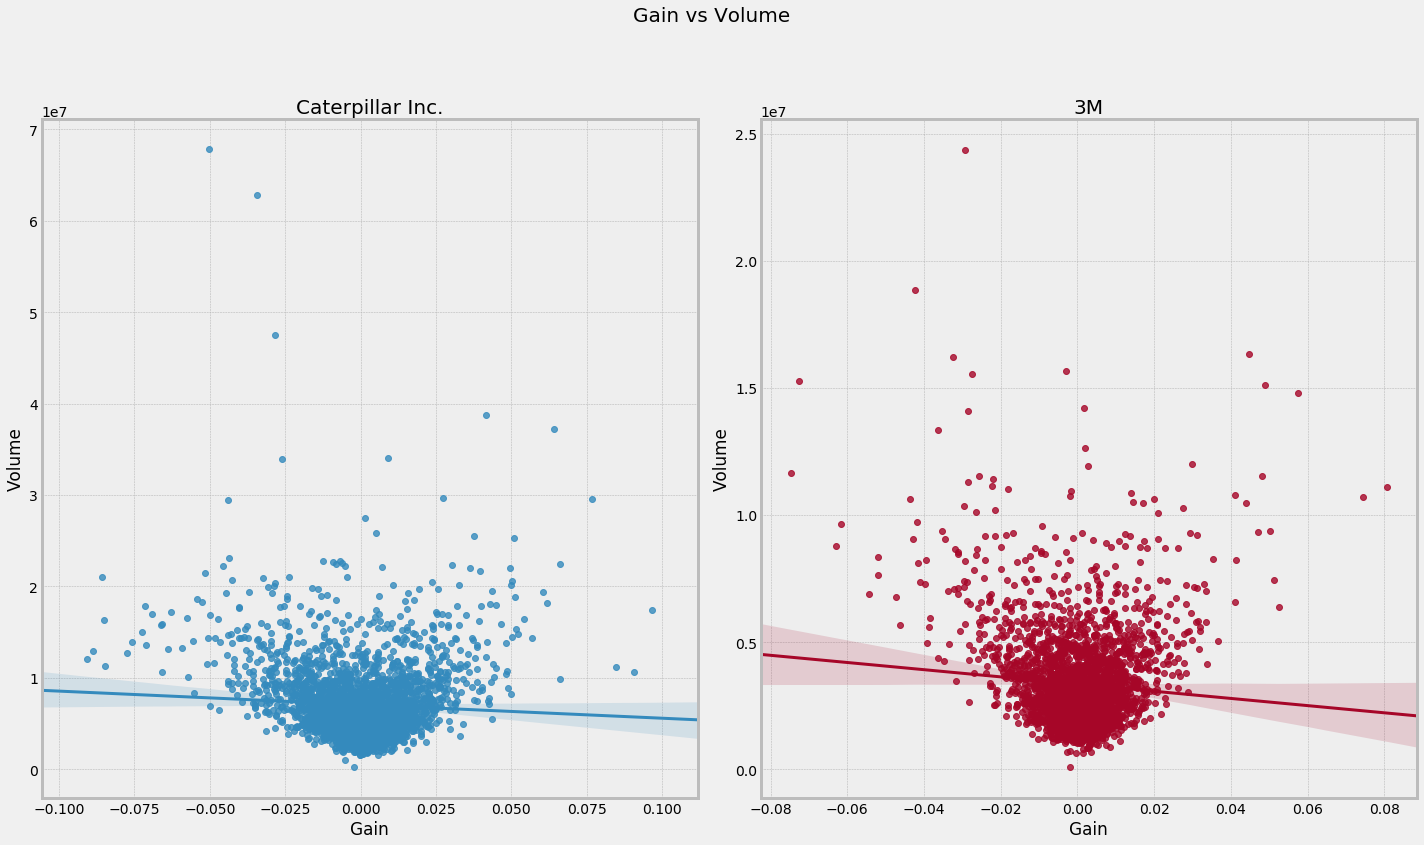

In [54]:
plt.style.use('bmh')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(20,12))
stocks['Gain']=(stocks['Close']-stocks['Open'])/stocks['Close']
sns.regplot(x='Gain',y='Volume',data=stocks[stocks['Name']=='CAT'],ax=ax1)
sns.regplot(x='Gain',y='Volume',data=stocks[stocks['Name']=='MMM'],ax=ax2)
plt.tight_layout()
ax1.set_title('Caterpillar Inc.',fontsize=20)
ax2.set_title('3M',fontsize=20)
plt.suptitle('Gain vs Volume',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)

### Gain vs. Volume plot for Amazon, Home Depot and Walmart (all retailers)

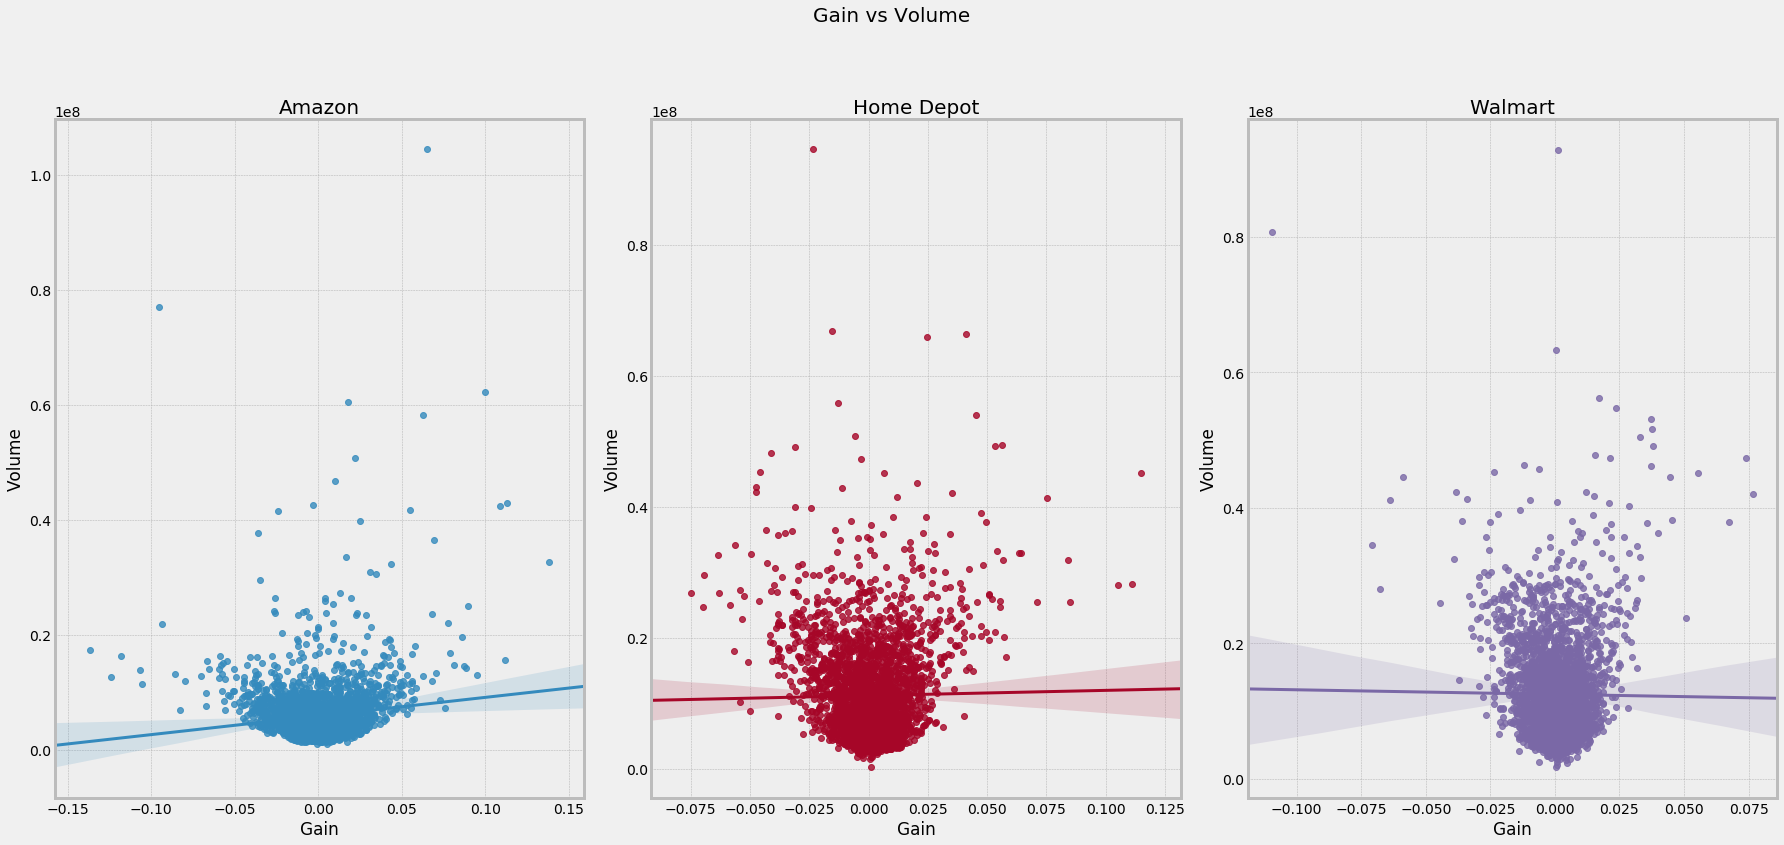

In [55]:
plt.style.use('bmh')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False,figsize=(25,12))
stocks['Gain']=(stocks['Close']-stocks['Open'])/stocks['Close']
sns.regplot(x='Gain',y='Volume',data=stocks[stocks['Name']=='AMZN'],ax=ax1)
sns.regplot(x='Gain',y='Volume',data=stocks[stocks['Name']=='HD'],ax=ax2)
sns.regplot(x='Gain',y='Volume',data=stocks[stocks['Name']=='WMT'],ax=ax3)
plt.tight_layout()
ax1.set_title('Amazon',fontsize=20)
ax2.set_title('Home Depot',fontsize=20)
ax3.set_title('Walmart',fontsize=20)
plt.suptitle('Gain vs Volume',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.85)

###### A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

### Moving Average Plot (15 days) for American Express, Goldman Sachs and JP Morgan (Financial Companies)

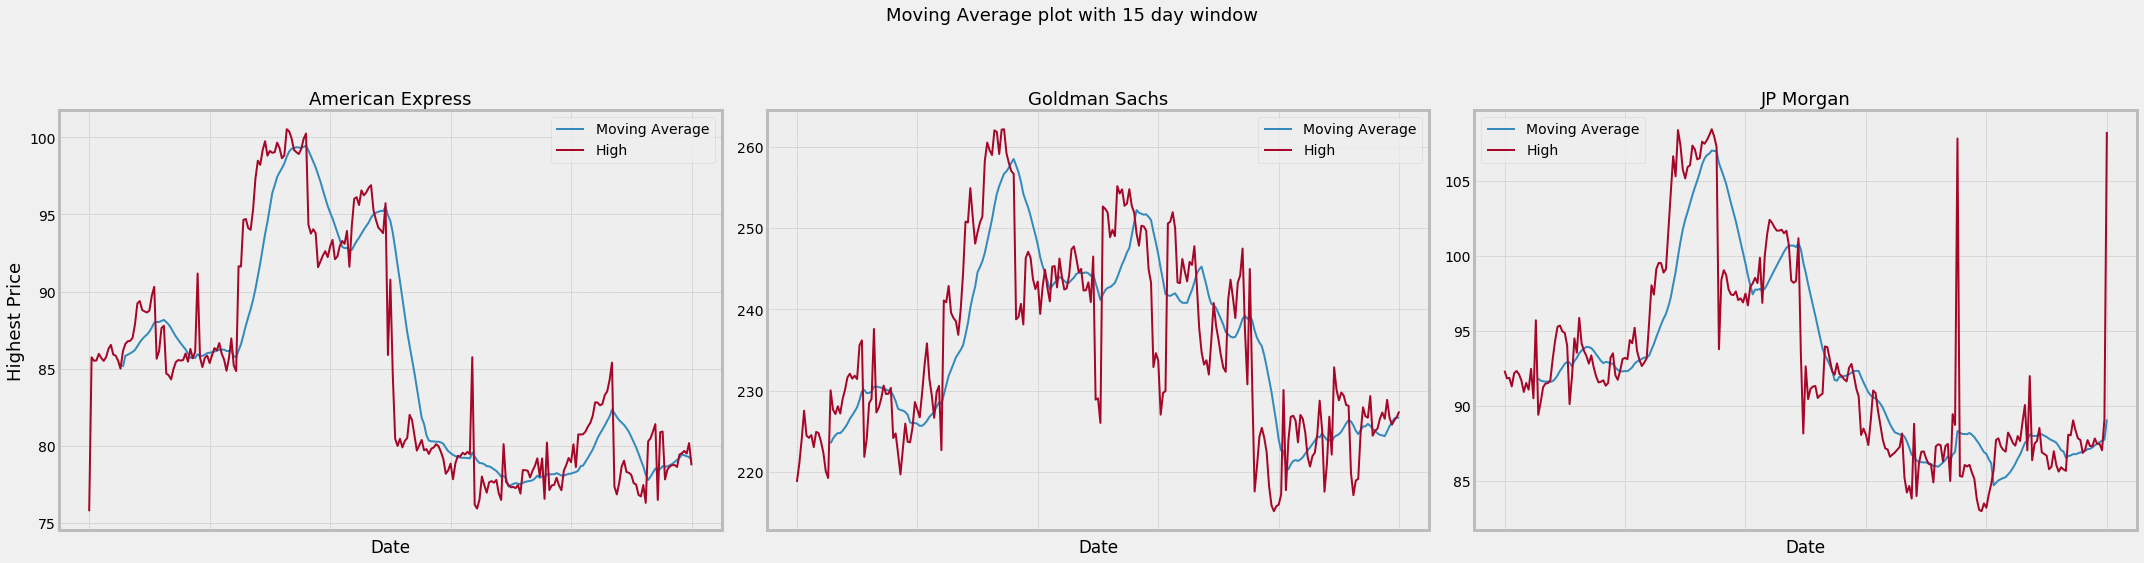

In [13]:
#Reading the data
All_Stocks=pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')
Stocks=All_Stocks[All_Stocks['Name'].isin(['GS','AXP','JPM'])].reset_index(drop=True)
Stocks.head()
plt.style.use('bmh')
#moving average plot
Stocks=Stocks.sort_values(by='Name',ascending=True).reset_index(drop=True)
Stocks['15d']= Stocks.groupby("Name")['High'].rolling(15).mean().reset_index(drop=True)
fig,axes=plt.subplots(1,3,figsize=(30,8))
Stocks[Stocks['Name']=='AXP'].plot(x='Date',y='15d',label='Moving Average',ax=axes[0])
Stocks[Stocks['Name']=='GS'].plot(x='Date',y='15d',label='Moving Average',ax=axes[1])
Stocks[Stocks['Name']=='JPM'].plot(x='Date',y='15d',label='Moving Average',ax=axes[2])
Stocks[Stocks['Name']=='AXP'].plot(x='Date',y='High',label='High',ax=axes[0])
Stocks[Stocks['Name']=='GS'].plot(x='Date',y='High',label='High',ax=axes[1])
Stocks[Stocks['Name']=='JPM'].plot(x='Date',y='High',label='High',ax=axes[2])
plt.suptitle("Moving Average plot with 15 day window",fontsize=18)

axes[0].set_ylabel("Highest Price",fontsize=18)
axes[0].set_title('American Express',fontsize=18)
axes[1].set_title('Goldman Sachs',fontsize=18)
axes[2].set_title('JP Morgan',fontsize=18)
plt.tight_layout()
fig.subplots_adjust(top=0.8)

### Moving Average Plot (15 days) for Johnson & Johnson, Merck & Co. and Pfizer (Pharma Companies)

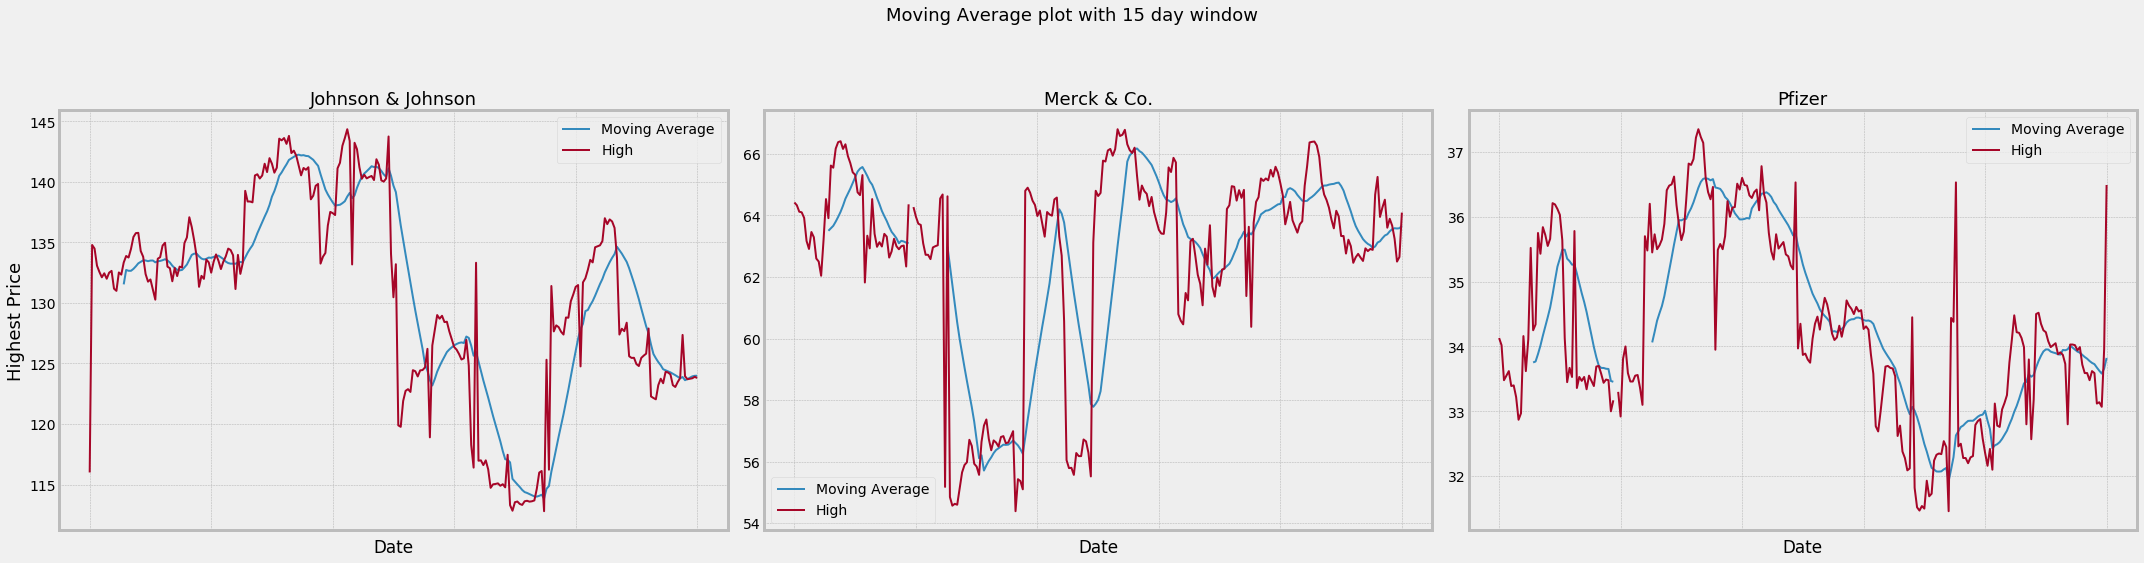

In [14]:
#Reading the data
All_Stocks=pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')
Stocks=All_Stocks[All_Stocks['Name'].isin(['JNJ','MRK','PFE'])].reset_index(drop=True)
Stocks.head()
plt.style.use('bmh')
#moving average plot
Stocks=Stocks.sort_values(by='Name',ascending=True).reset_index(drop=True)
Stocks['15d']= Stocks.groupby("Name")['High'].rolling(15).mean().reset_index(drop=True)
fig,axes=plt.subplots(1,3,figsize=(30,8))
Stocks[Stocks['Name']=='JNJ'].plot(x='Date',y='15d',label='Moving Average',ax=axes[0])
Stocks[Stocks['Name']=='MRK'].plot(x='Date',y='15d',label='Moving Average',ax=axes[1])
Stocks[Stocks['Name']=='PFE'].plot(x='Date',y='15d',label='Moving Average',ax=axes[2])
Stocks[Stocks['Name']=='JNJ'].plot(x='Date',y='High',label='High',ax=axes[0])
Stocks[Stocks['Name']=='MRK'].plot(x='Date',y='High',label='High',ax=axes[1])
Stocks[Stocks['Name']=='PFE'].plot(x='Date',y='High',label='High',ax=axes[2])
plt.suptitle("Moving Average plot with 15 day window",fontsize=18)

axes[0].set_ylabel("Highest Price",fontsize=18)
axes[0].set_title('Johnson & Johnson',fontsize=18)
axes[1].set_title('Merck & Co.',fontsize=18)
axes[2].set_title('Pfizer',fontsize=18)
plt.tight_layout()
fig.subplots_adjust(top=0.8)